In [3]:
import pandas as pd
import netCDF4 
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
from copulas.multivariate import GaussianMultivariate
from copulas.multivariate import VineCopula
from copulas.visualization import compare_3d
from copulas.visualization import scatter_3d
from sklearn.preprocessing import MinMaxScaler
from copulas.univariate import GaussianUnivariate
import copulas.bivariate


# Import data

In [104]:
import cdsapi

dataset = "derived-era5-pressure-levels-daily-statistics"
request = {
    "product_type": "reanalysis",
    "variable": ["relative_humidity"],
    "year": "2022",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "pressure_level": ["1000"],
    "daily_statistic": "daily_maximum",
    "time_zone": "utc+00:00",
    "frequency": "6_hourly",
    "area": [50, -10, 30, 10]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2025-05-01 13:13:56,910 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-01 13:13:56,910 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-01 13:13:57,422 WARNING [2025-02-12T00:00:00] Requests for non-consecutive date ranges combined with non-UTC time-zones may contain undersampled data points for the dates before and after the gap in the date range. See known-issues table on documentation tab for more details.
2025-05-01 13:13:57,422 INFO Request ID is 57a5f740-bd31-4eb9-8f17-3234e2d0b2cc
2025-05-01 13:13:57,624 INFO status has been updated to accepted
2025-05-01 13:14:06,427 INFO status has been updated to running
2025-05-01 13:16:51,047 INFO status has been updated to suc

'eda01e49c71620708a7020b836369dc5.nc'

In [105]:
import cdsapi

dataset = "derived-era5-pressure-levels-daily-statistics"
request = {
    "product_type": "reanalysis",
    "variable": ["temperature"],
    "year": "2022",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "pressure_level": ["1000"],
    "daily_statistic": "daily_maximum",
    "time_zone": "utc+00:00",
    "frequency": "6_hourly",
    "area": [50, -10, 30, 10]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2025-05-01 13:16:53,194 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-01 13:16:53,199 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-01 13:16:53,749 WARNING [2025-02-12T00:00:00] Requests for non-consecutive date ranges combined with non-UTC time-zones may contain undersampled data points for the dates before and after the gap in the date range. See known-issues table on documentation tab for more details.
2025-05-01 13:16:53,757 INFO Request ID is ad491241-c53c-49e7-9727-fbd5489d7ed5
2025-05-01 13:16:53,856 INFO status has been updated to accepted
2025-05-01 13:45:21,215 INFO status has been updated to running
2025-05-01 13:47:21,523 INFO status has been updated to suc

'aeab4457c56d1d4d643676a5b9a769e6.nc'

In [106]:
import cdsapi

dataset = "derived-era5-pressure-levels-daily-statistics"
request = {
    "product_type": "reanalysis",
    "variable": ["v_component_of_wind"],
    "year": "2022",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "pressure_level": ["1000"],
    "daily_statistic": "daily_maximum",
    "time_zone": "utc+00:00",
    "frequency": "6_hourly",
    "area": [50, -10, 30, 10]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2025-05-01 13:47:23,927 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-01 13:47:23,935 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-01 13:47:24,537 WARNING [2025-02-12T00:00:00] Requests for non-consecutive date ranges combined with non-UTC time-zones may contain undersampled data points for the dates before and after the gap in the date range. See known-issues table on documentation tab for more details.
2025-05-01 13:47:24,545 INFO Request ID is 40af0caf-303d-4f98-a281-184ed0f3dea9
2025-05-01 13:47:24,742 INFO status has been updated to accepted
2025-05-01 14:03:53,246 INFO status has been updated to running
2025-05-01 14:05:53,682 INFO status has been updated to acc

'4932e0c9b604b66f0a4b381d8ee7ae6.nc'

In [107]:
import cdsapi

dataset = "derived-era5-pressure-levels-daily-statistics"
request = {
    "product_type": "reanalysis",
    "variable": ["u_component_of_wind"],
    "year": "2022",
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "pressure_level": ["1000"],
    "daily_statistic": "daily_maximum",
    "time_zone": "utc+00:00",
    "frequency": "6_hourly",
    "area": [50, -10, 30, 10]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2025-05-01 14:09:56,936 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-01 14:09:56,936 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-01 14:09:57,366 WARNING [2025-02-12T00:00:00] Requests for non-consecutive date ranges combined with non-UTC time-zones may contain undersampled data points for the dates before and after the gap in the date range. See known-issues table on documentation tab for more details.
2025-05-01 14:09:57,366 INFO Request ID is a93bcba2-4127-46e7-b4ad-65a43c2c1965
2025-05-01 14:09:57,466 INFO status has been updated to accepted
2025-05-01 14:28:22,064 INFO status has been updated to running
2025-05-01 14:30:22,596 INFO status has been updated to suc

'9221fa12aa3b450b1096aa19afcff0a3.nc'

# Explore

In [4]:
data_folder = "data"
netcdf_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(".nc")]

In [5]:
netcdf_files

['data\\06_hot_days-reanalysis-monthly-30deg-grid-1940-2023-v1.0.nc',
 'data\\06_hot_days-reanalysis-monthly-35deg-grid-1940-2023-v1.0.nc',
 'data\\18_consecutive_dry_days-reanalysis-monthly-grid-1940-2023-v1.0.nc',
 'data\\24_extreme_wind_speed_days-reanalysis-monthly-grid-1940-2023-v1.0.nc',
 'data\\relative_humidity.nc',
 'data\\temperature.nc',
 'data\\u_component_of_wind.nc',
 'data\\v_component_of_wind.nc']

In [110]:
import xarray as xr
import glob
# dry= xr.open_dataset("data\\relative_humidity.nc")
# hot= xr.open_dataset("data\\temperature.nc")
# wind_u= xr.open_dataset("data\\u_component_of_wind.nc")
# wind_v= xr.open_dataset("data\\v_component_of_wind.nc")

rh_files = sorted(glob.glob("data\\relative_humidity*.nc"))
t_files  = sorted(glob.glob("data\\temperature*.nc"))
u_files  = sorted(glob.glob("data\\u_component_of_wind*.nc"))
v_files  = sorted(glob.glob("data\\v_component_of_wind*.nc"))

# 2) Charger chaque série annuelle en un seul Dataset multi-années
dry = xr.open_mfdataset(rh_files, combine="by_coords")
hot  = xr.open_mfdataset(t_files,  combine="by_coords")
wind_u  = xr.open_mfdataset(u_files,  combine="by_coords")
wind_v  = xr.open_mfdataset(v_files,  combine="by_coords")


In [111]:
wind_u

<xarray.Dataset> Size: 29MB
Dimensions:         (valid_time: 1096, pressure_level: 1, latitude: 81,
                     longitude: 81)
Coordinates:
    number          int64 8B 0
  * pressure_level  (pressure_level) float64 8B 1e+03
  * latitude        (latitude) float64 648B 50.0 49.75 49.5 ... 30.5 30.25 30.0
  * longitude       (longitude) float64 648B -10.0 -9.75 -9.5 ... 9.5 9.75 10.0
  * valid_time      (valid_time) datetime64[ns] 9kB 2022-01-01 ... 2024-12-31
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 29MB dask.array<chunksize=(365, 1, 81, 81), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-01T12:29 GRIB to CDM+CF via cfgrib-0.9.1...

In [120]:
# 1) Saisie de la localisation
# ## maroc
# lat_sel = 30
# lon_sel = 0
#landes
lat_sel = 44
lon_sel = -0.75

# 3) Sélection au niveau 1000 hPa et à la localisation choisie
rh = dry['r'] \
       .sel(latitude=lat_sel, longitude=lon_sel, method='nearest') \
       .rename('dry')

t  = hot['t'] \
       .sel( latitude=lat_sel, longitude=lon_sel, method='nearest')

u  = wind_u['u'] \
       .sel(latitude=lat_sel, longitude=lon_sel, method='nearest')

v  = wind_v['v'] \
       .sel(latitude=lat_sel, longitude=lon_sel, method='nearest')

# 4) Calculs dérivés
t2m_C      = (t - 273.15).rename('hot')            # K → °C
wind_speed = np.sqrt(u**2 + v**2).rename('wind')

# 5) Fusionner et convertir en DataFrame
ds_loc = xr.merge([rh, t2m_C, wind_speed])
df = ds_loc.to_dataframe().reset_index()

# 6) Afficher et/ou sauvegarder
print(df.head())


   pressure_level valid_time  number  latitude  longitude        dry  \
0          1000.0 2022-01-01       0      44.0      -0.75  38.041851   
1          1000.0 2022-01-02       0      44.0      -0.75  76.587906   
2          1000.0 2022-01-03       0      44.0      -0.75  77.820526   
3          1000.0 2022-01-04       0      44.0      -0.75  97.265579   
4          1000.0 2022-01-05       0      44.0      -0.75  92.100044   

         hot       wind  
0  19.909332   8.657652  
1  19.147614  11.742547  
2  15.631012   5.025979  
3  16.095856   5.613977  
4   7.964996   4.178476  


In [118]:
df['HDW'] = (
    (df['hot'] > 35) &
    (df['dry'] < 30) &
    (df['wind'] >= 7)
).astype(int)

print(df[['hot',
'dry','wind','HDW']].head())


         hot        dry      wind  HDW
0  18.184723  66.246834  5.078631    0
1  18.203766  81.589874  4.702754    0
2  18.066559  84.659286  4.790985    0
3  18.070221  77.387192  1.383591    0
4  18.862701  81.121750  1.336759    0


In [119]:
df.groupby("HDW").count()
# Maroc

,pressure_level,valid_time,number,latitude,longitude,dry,hot,wind
HDW,,,,,,,,
0,1063,1063,1063,1063,1063,1063,1063,1063
1,33,33,33,33,33,33,33,33


In [99]:
df.groupby("HDW").count()
# Landes

,pressure_level,valid_time,number,latitude,longitude,dry,hot,wind
HDW,,,,,,,,
0,366,366,366,366,366,366,366,366


In [74]:
def uniformize_data(df, columns):
    """
    Transforme chaque colonne du DataFrame en pseudo-observations uniformes [0,1]
    Utilisé pour ajuster une copule.

    Args:
        df (pd.DataFrame): DataFrame contenant les colonnes à transformer.
        columns (list): Liste des noms de colonnes à transformer.

    Returns:
        np.ndarray: Tableau numpy transformé (n, d)
    """
    n = len(df)
    u = np.zeros((n, len(columns)))

    for i, col in enumerate(columns):
        ranks = df[col].rank(method='average')  # méthode 'average' pour être stable
        u[:, i] = ranks / (n + 1)  # normalisation sur [0,1]

    return u

# Exemple d’utilisation :
columns = ['dry', 'hot', 'wind']
df_normalized =pd.DataFrame(uniformize_data(df, columns), columns=columns)


In [75]:
df_normalized

,dry,hot,wind
0,0.493188,0.155313,0.858311
1,0.103542,0.381471,0.888283
2,0.596730,0.245232,0.948229
3,0.316076,0.258856,0.926431
4,0.850136,0.100817,0.185286
...,...,...,...
361,0.931880,0.065395,0.108992
362,0.215259,0.168937,0.351499
363,0.888283,0.073569,0.089918
364,0.907357,0.021798,0.144414


# Copule bivariés

## Algérie, désert

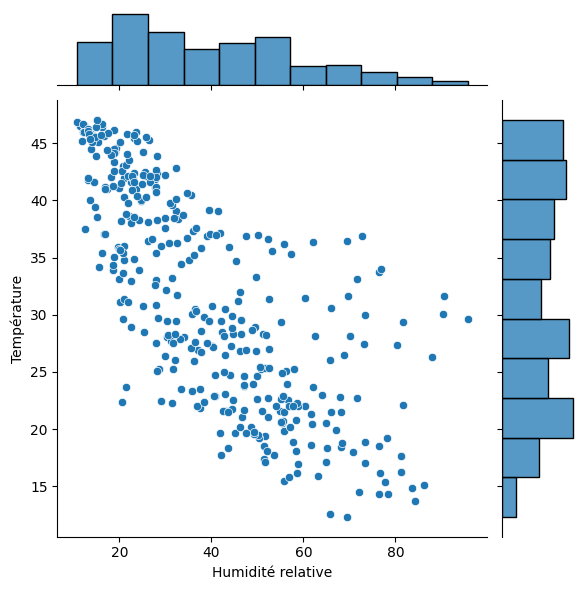

In [51]:
h = sns.jointplot(x=df.dry, y=df.hot, kind="scatter")
h.set_axis_labels(f"Humidité relative", f"Température", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


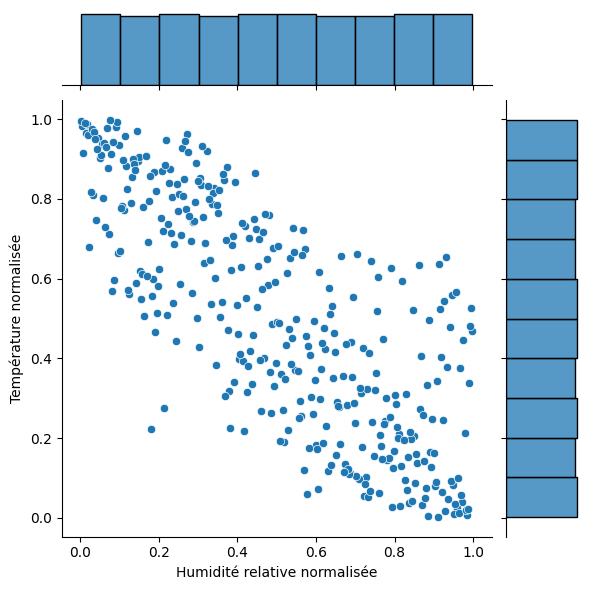

In [53]:
h = sns.jointplot(x=df_normalized.dry, y=df_normalized.hot, kind="scatter")
h.set_axis_labels(f"Humidité relative normalisée", f"Température normalisée", fontsize=10)
# h2.savefig(f"output/distribution_jointe_normalisé_{self.nom_variable1}_{self.nom_variable2}.png")


In [42]:
result = copulas.bivariate.base.Bivariate().select_copula(df_normalized[["dry","hot"]].to_numpy())
copule_selectionnee = result
nom_copule = result.to_dict()["copula_type"]
theta = copule_selectionnee.theta
kendall = theta / (theta + 2)
print(nom_copule)
print(theta)
print(kendall)

FRANK
-7.621283186946802
1.3557906501925052


C:\Users\lucas\AppData\Local\Temp\ipykernel_80424\905857261.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


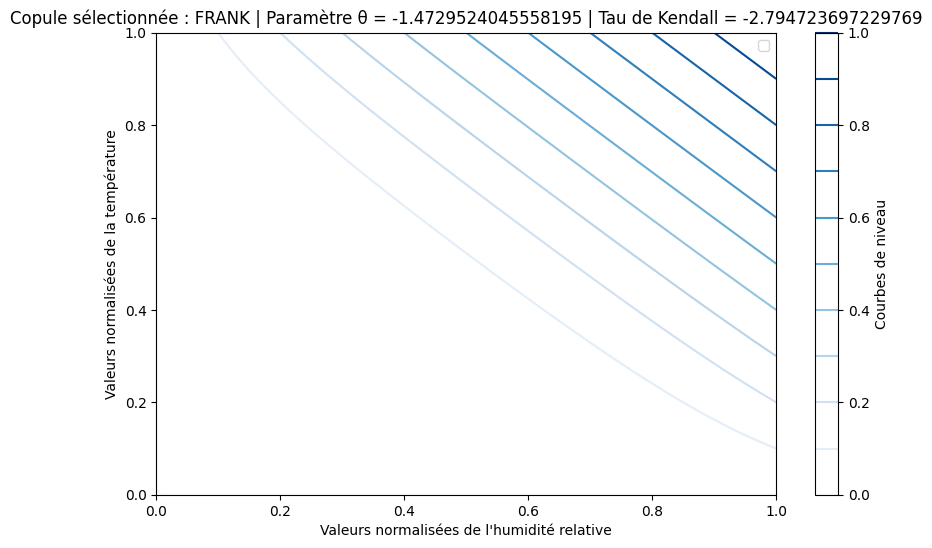

In [54]:
donnees = np.column_stack(
            (df_normalized.dry, df_normalized.hot)
        )
copule_selectionnee.fit(donnees)
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Z = copule_selectionnee.cumulative_distribution(
            np.column_stack((U.ravel(), V.ravel()))
        ).reshape(100, 100)

plt.figure(figsize=(10, 6))
contour = plt.contour(U, V, Z, levels=np.linspace(0, 1, 11), cmap="Blues")
cbar = plt.colorbar(contour)
cbar.set_label("Courbes de niveau")
# plt.scatter(
#            df_normalized.dry,
#             df_normalized.hot,
#             c="red",
#             label="Observations normalisées",
#             alpha=0.5,
#         )# Déterminer le contenu du titre dynamiquement
theta_display =theta
tau_display =kendall
titre = (
            f"Copule sélectionnée : {nom_copule} | "
            f"Paramètre θ = {theta_display} | "
            f"Tau de Kendall = {tau_display}"
        )

plt.title(titre)
plt.xlabel(f"Valeurs normalisées de l'humidité relative")
plt.ylabel(f"Valeurs normalisées de la température")
plt.legend()
#plt.savefig(f"output/Copule_{self.nom_copule}_{self.nom_variable1}_{self.nom_variable2}.png")

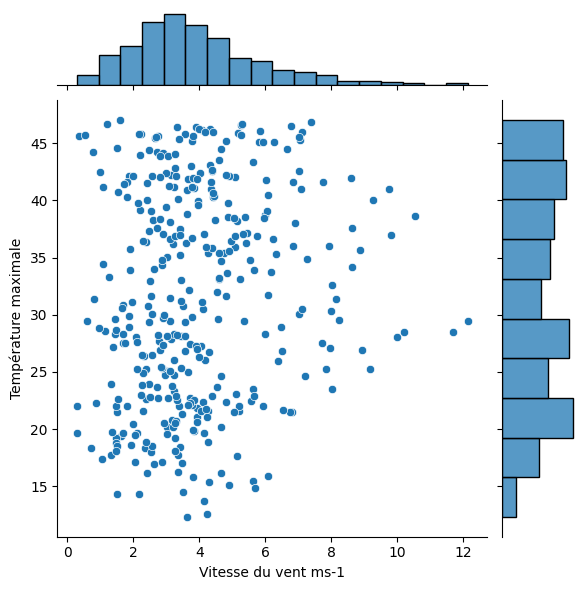

In [55]:
h = sns.jointplot(x=df.wind, y=df.hot, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1", f"Température maximale", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


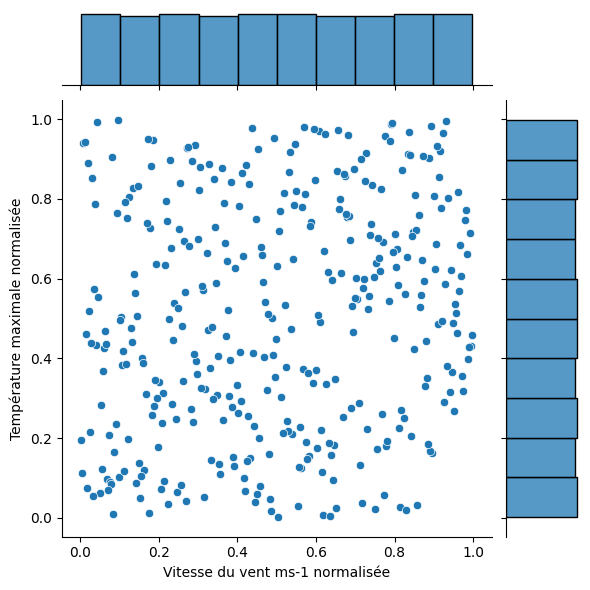

In [56]:
h = sns.jointplot(x=df_normalized.wind, y=df_normalized.hot, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1 normalisée", f"Température maximale normalisée", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


In [57]:
result = copulas.bivariate.base.Bivariate().select_copula(df_normalized[["wind","hot"]].to_numpy())
copule_selectionnee = result
nom_copule = result.to_dict()["copula_type"]
theta = copule_selectionnee.theta
kendall = theta / (theta + 2)
print(nom_copule)
print(theta)
print(kendall)

FRANK
0.978964751501043
0.32862582580333033


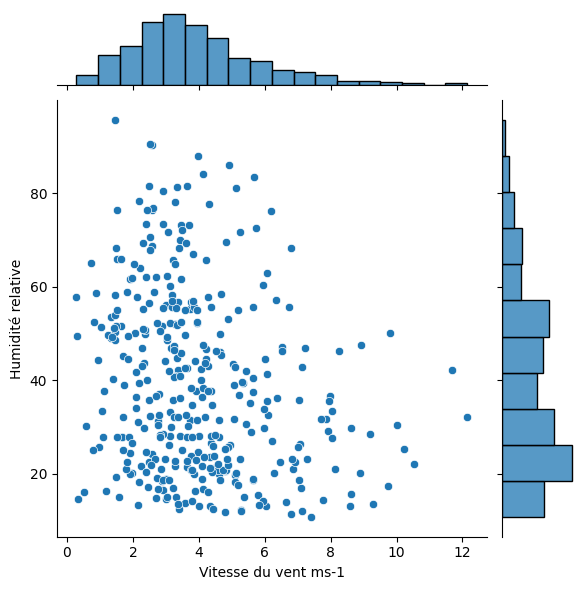

In [58]:
h = sns.jointplot(x=df.wind, y=df.dry, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1", f"Humidité relative", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


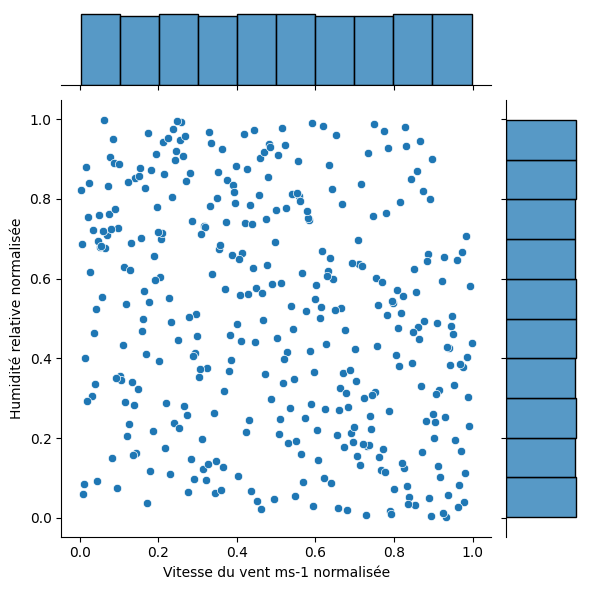

In [59]:
h = sns.jointplot(x=df_normalized.wind, y=df_normalized.dry, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1 normalisée", f"Humidité relative normalisée", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


In [60]:
result = copulas.bivariate.base.Bivariate().select_copula(df_normalized[["wind","dry"]].to_numpy())
copule_selectionnee = result
nom_copule = result.to_dict()["copula_type"]
theta = copule_selectionnee.theta
kendall = theta / (theta + 2)
print(nom_copule)
print(theta)
print(kendall)

FRANK
-1.4729524045558195
-2.794723697229769


## Landes

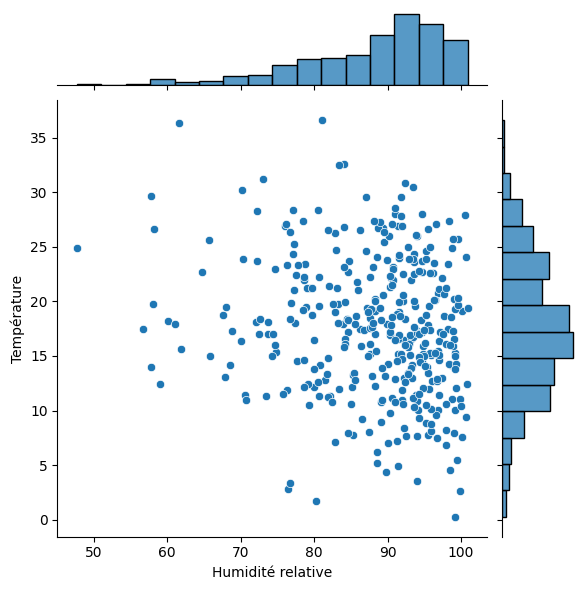

In [76]:
h = sns.jointplot(x=df.dry, y=df.hot, kind="scatter")
h.set_axis_labels(f"Humidité relative", f"Température", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


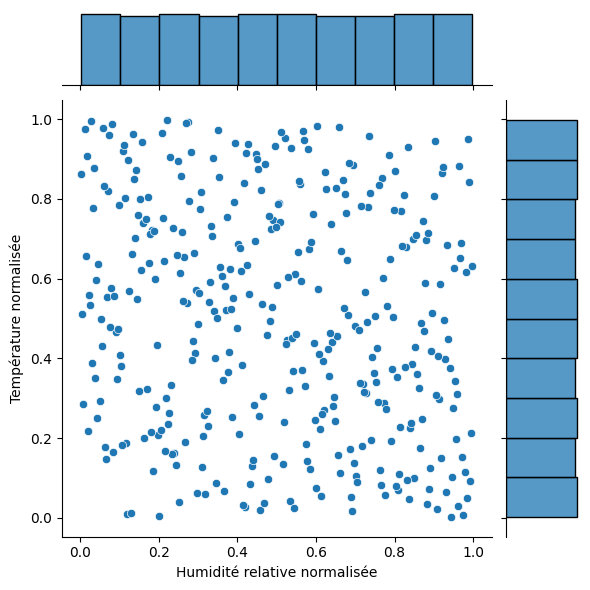

In [77]:
h = sns.jointplot(x=df_normalized.dry, y=df_normalized.hot, kind="scatter")
h.set_axis_labels(f"Humidité relative normalisée", f"Température normalisée", fontsize=10)
# h2.savefig(f"output/distribution_jointe_normalisé_{self.nom_variable1}_{self.nom_variable2}.png")


In [78]:
result = copulas.bivariate.base.Bivariate().select_copula(df_normalized[["dry","hot"]].to_numpy())
copule_selectionnee = result
nom_copule = result.to_dict()["copula_type"]
theta = copule_selectionnee.theta
kendall = theta / (theta + 2)
print(nom_copule)
print(theta)
print(kendall)

FRANK
-1.0854750735815013
-1.1869278159891004


C:\Users\lucas\AppData\Local\Temp\ipykernel_80424\905857261.py:34: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



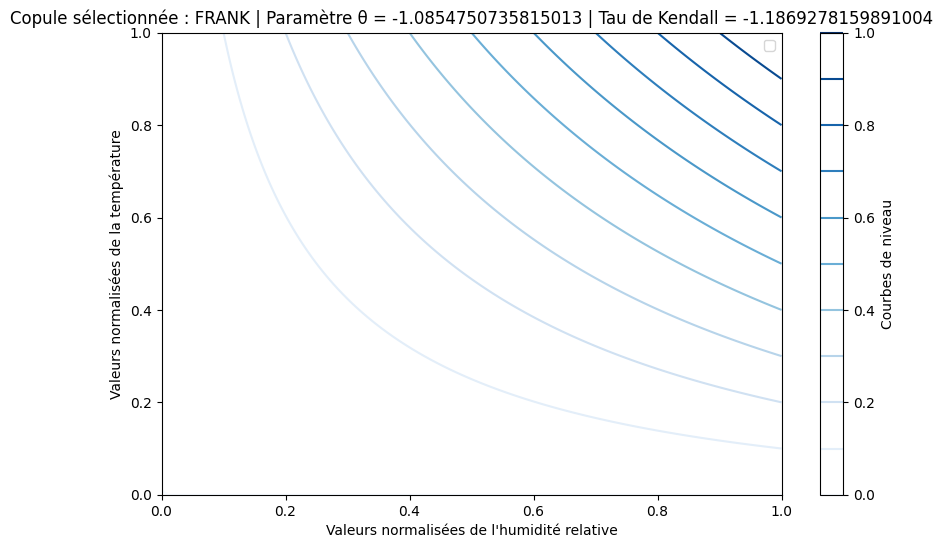

In [79]:
donnees = np.column_stack(
            (df_normalized.dry, df_normalized.hot)
        )
copule_selectionnee.fit(donnees)
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Z = copule_selectionnee.cumulative_distribution(
            np.column_stack((U.ravel(), V.ravel()))
        ).reshape(100, 100)

plt.figure(figsize=(10, 6))
contour = plt.contour(U, V, Z, levels=np.linspace(0, 1, 11), cmap="Blues")
cbar = plt.colorbar(contour)
cbar.set_label("Courbes de niveau")
# plt.scatter(
#            df_normalized.dry,
#             df_normalized.hot,
#             c="red",
#             label="Observations normalisées",
#             alpha=0.5,
#         )# Déterminer le contenu du titre dynamiquement
theta_display =theta
tau_display =kendall
titre = (
            f"Copule sélectionnée : {nom_copule} | "
            f"Paramètre θ = {theta_display} | "
            f"Tau de Kendall = {tau_display}"
        )

plt.title(titre)
plt.xlabel(f"Valeurs normalisées de l'humidité relative")
plt.ylabel(f"Valeurs normalisées de la température")
plt.legend()
#plt.savefig(f"output/Copule_{self.nom_copule}_{self.nom_variable1}_{self.nom_variable2}.png")

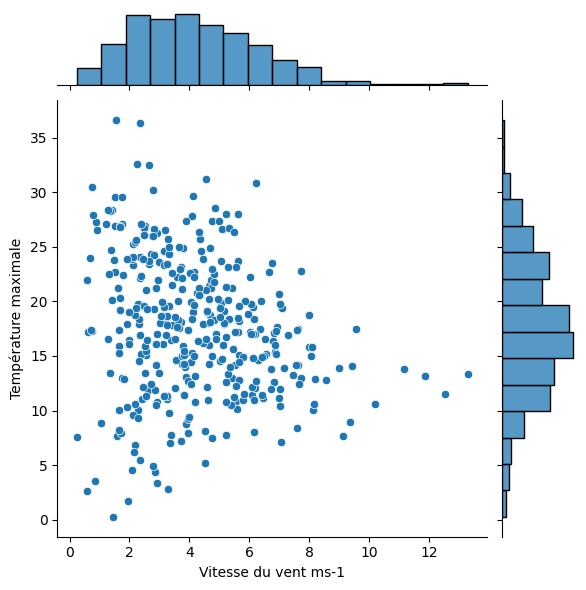

In [80]:
h = sns.jointplot(x=df.wind, y=df.hot, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1", f"Température maximale", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


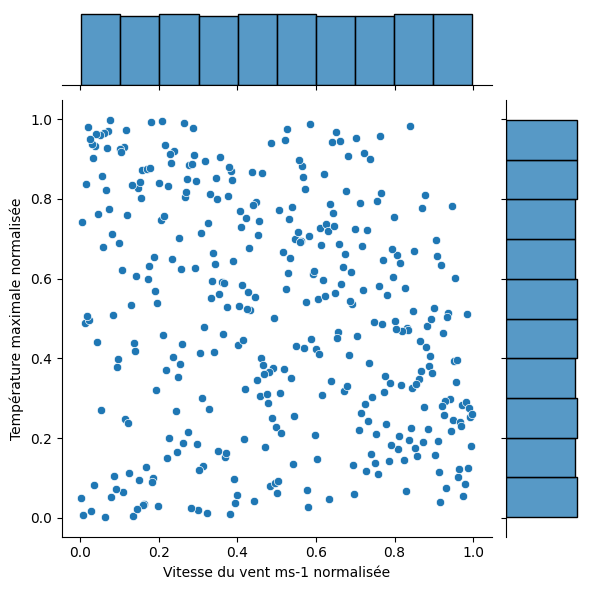

In [81]:
h = sns.jointplot(x=df_normalized.wind, y=df_normalized.hot, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1 normalisée", f"Température maximale normalisée", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


In [82]:
result = copulas.bivariate.base.Bivariate().select_copula(df_normalized[["wind","hot"]].to_numpy())
copule_selectionnee = result
nom_copule = result.to_dict()["copula_type"]
theta = copule_selectionnee.theta
kendall = theta / (theta + 2)
print(nom_copule)
print(theta)
print(kendall)

FRANK
-1.3939744560322291
-2.3001909241409177


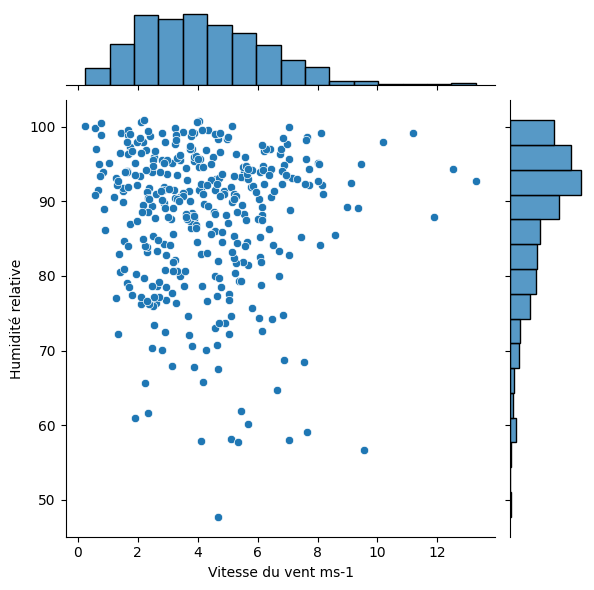

In [83]:
h = sns.jointplot(x=df.wind, y=df.dry, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1", f"Humidité relative", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


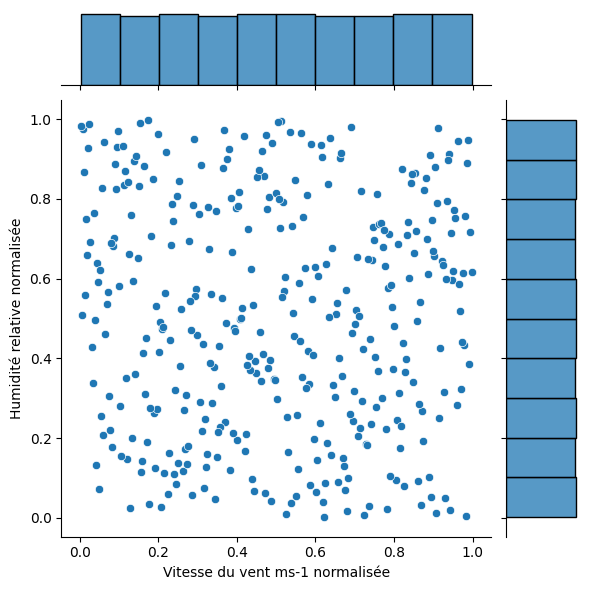

In [84]:
h = sns.jointplot(x=df_normalized.wind, y=df_normalized.dry, kind="scatter")
h.set_axis_labels(f"Vitesse du vent ms-1 normalisée", f"Humidité relative normalisée", fontsize=10)
# return h.savefig(f"output/distribution_jointe_{self.nom_variable1}_{self.nom_variable2}.png")


In [85]:
result = copulas.bivariate.base.Bivariate().select_copula(df_normalized[["wind","dry"]].to_numpy())
copule_selectionnee = result
nom_copule = result.to_dict()["copula_type"]
theta = copule_selectionnee.theta
kendall = theta / (theta + 2)
print(nom_copule)
print(theta)
print(kendall)

FRANK
-0.20384392644898222
-0.11348898319619899


# Copule multivarié

## Algérie, désert

In [61]:

copula = VineCopula("center")
copula.fit(df_normalized)
synthetic_data = copula.sample(len(df_normalized))

c:\Users\lucas\OneDrive\Documents\M2 MSOEF\Data mining\projet kaggle\.venv\lib\site-packages\copulas\multivariate\vine.py:78: UserWarning: Vines have not been fully tested on Python >= 3.8 and might produce wrong results.
  warnings.warn(


In [62]:
copula_params = copula.to_dict()
copula_params.keys()

dict_keys(['type', 'vine_type', 'fitted', 'n_sample', 'n_var', 'depth', 'truncated', 'trees', 'tau_mat', 'u_matrix', 'unis', 'columns'])

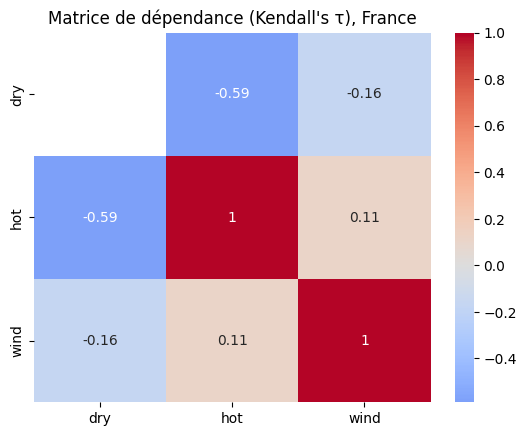

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tau_mat = np.array(copula_params['tau_mat'])
labels = ['dry', 'hot', 'wind']

sns.heatmap(tau_mat, annot=True, xticklabels=labels, yticklabels=labels, cmap='coolwarm', center=0)
plt.title("Matrice de dépendance (Kendall's τ), France")
plt.show()


In [64]:
copula_params['type']

'copulas.multivariate.vine.VineCopula'

In [66]:
df.columns

Index(['pressure_level', 'valid_time', 'number', 'latitude', 'longitude',
       'dry', 'hot', 'wind', 'HDW'],
      dtype='object')

In [69]:
scatter_3d(df[['dry', 'hot', 'wind']])
# scatter_3d(df_normalized)

In [70]:

compare_3d(df_normalized, synthetic_data)

## Landes

In [86]:

copula = VineCopula("center")
copula.fit(df_normalized)
synthetic_data = copula.sample(len(df_normalized))

c:\Users\lucas\OneDrive\Documents\M2 MSOEF\Data mining\projet kaggle\.venv\lib\site-packages\copulas\multivariate\vine.py:78: UserWarning:

Vines have not been fully tested on Python >= 3.8 and might produce wrong results.



In [87]:
copula_params = copula.to_dict()
copula_params.keys()

dict_keys(['type', 'vine_type', 'fitted', 'n_sample', 'n_var', 'depth', 'truncated', 'trees', 'tau_mat', 'u_matrix', 'unis', 'columns'])

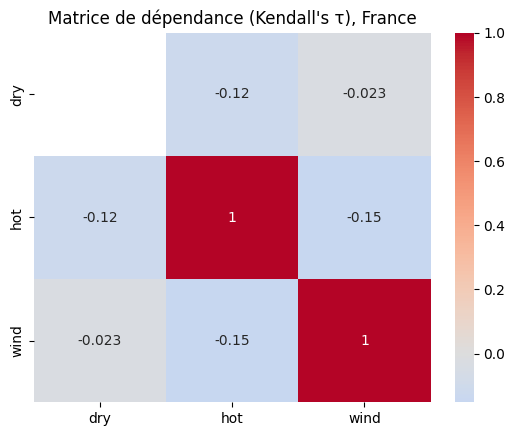

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tau_mat = np.array(copula_params['tau_mat'])
labels = ['dry', 'hot', 'wind']

sns.heatmap(tau_mat, annot=True, xticklabels=labels, yticklabels=labels, cmap='coolwarm', center=0)
plt.title("Matrice de dépendance (Kendall's τ), France")
plt.show()


In [89]:
copula_params['type']

'copulas.multivariate.vine.VineCopula'

In [91]:
df.columns

Index(['pressure_level', 'valid_time', 'number', 'latitude', 'longitude',
       'dry', 'hot', 'wind', 'HDW'],
      dtype='object')

In [92]:
scatter_3d(df[['dry', 'hot', 'wind']])
# scatter_3d(df_normalized)

In [93]:

compare_3d(df_normalized, synthetic_data)